<IPython.core.display.Javascript object>


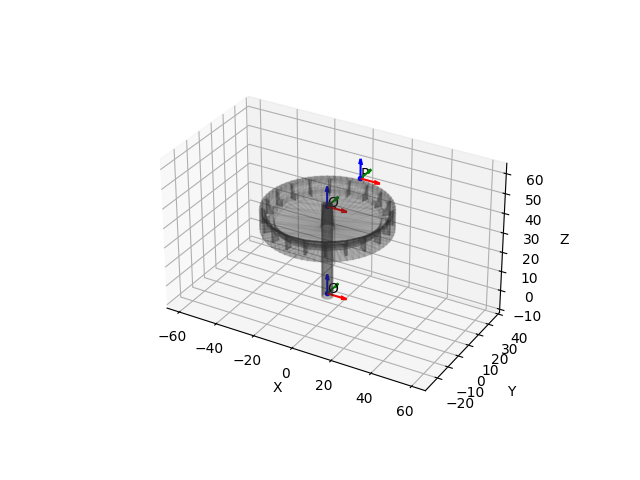

In [17]:
from sympy.physics.mechanics import ReferenceFrame,Point,dynamicsymbols
from sympy.physics.mechanics import Point
from sympy import latex,pprint,symbols,init_printing
from sympy.algebras.quaternion import Quaternion
import numpy as np
import sys 
sys.path.append("../tools")
from vis import Visualizer
%matplotlib notebook
init_printing() # Para visualizar simbolos

# Aplicando esto para el caso del modelo giro-péndulo
q1,q2=dynamicsymbols('q1,q2')
# Variables de distancia l1: longitud del pendulo, R: radio del disco
l1,R=symbols('l1,R') 

#Defina marcos de referencia
a=ReferenceFrame('A')
e=a.orientnew('E','Axis',(q1,a.y))
b=e.orientnew('B','Axis',(q2,-e.z))

#Defina el punto de origen
O=Point('O')
O.set_vel(a,0)
# Ahora defina el punto Q en el centro del disco
q=O.locatenew('Q',l1*e.z)
# Defina el punto P en la periferia del disco
p=q.locatenew('P',R*b.y)

vis=Visualizer(a,O)
vis.add(a,O,frame_scale=10)
vis.add(b,q,frame_scale=10)
vis.add(b,p,frame_scale=10)
vis.add(e,q,shape='assets/Atraccion_GiroPendulo_pivote.stl')
vis.add(b,q,shape='assets/Atraccion_GiroPendulo_disk.stl')
vis.plot({l1:45,R:30,q1:0.5,q2:0})

In [18]:
#Modifique las variables de movimiento para cambiar la configuracion cinematica del modelo
#Puede hacerlo desde esta celda para actualizar el modelo sin tener que volver a generar la figura.
vis.plot({l1:45,R:30,q1:0.9,q2:0.5})

In [20]:
#Esto permite crear animaciones facilmente
#Ejecute esta celda y de click en la figura 1 para observar la animacion del movimiento.
import matplotlib
from matplotlib.animation import FuncAnimation
tt=np.linspace(0,10,200)
qq1=np.sin(2*np.pi*0.1*tt)
qq2=np.linspace(0,np.pi*2*10,len(tt))

def animfunc(i,qq1,qq2):
    vis.plot({l1:45,R:30,q1:qq1[i],q2:qq2[i]})
FuncAnimation(vis.fig,animfunc,fargs=(qq1,qq2),interval=5)